https://github.com/gzr2017/ImageProcessing100Wen/blob/master/Question_01_10/README.md

## 1. 通道交换
读取图像，然后将$\text{RGB}$通道替换成$\text{BGR}$通道。

注意，cv2.imread() 的系数是按$\text{BGR}$顺序排列的！


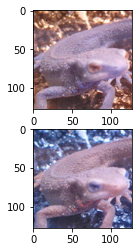

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

def BGR2RGB(bgr_img):
    rgb_img = bgr_img[:, :, (2, 1, 0)]
    return rgb_img
    

img = cv2.imread("../Question_01_10/imori.jpg")
img2 = BGR2RGB(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2)
plt.show()

## 2. 灰度化(Grayscale)
灰度是一种图像亮度的表示方法，通过下式计算： $$ Y = 0.2126\ R + 0.7152\ G + 0.0722\ B $$

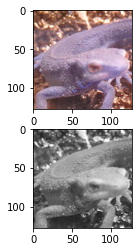

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

def BGR2GRAY(img):
    _img = img.astype("float32")
    blue, green, red = _img[:,:,0],_img[:,:,1],_img[:,:,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

img = cv2.imread("../Question_01_10/imori.jpg")
img2 = BGR2GRAY(img)


plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2, cmap="gray")
plt.show()

## 3.二值化(Thresholding)
二值化是将图像使用黑和白两种颜色表示的方法。

我们将灰度的阈值设置为$128$来进行二值化，即： $$ y= \begin{cases} 0& (\text{if}\quad y < 128) \\ 255& (\text{else}) \end{cases} $$

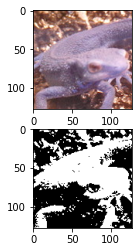

In [3]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def BGR2GRAY(img):
    _img = img.astype("float32")
    blue, green, red = _img[:,:,0],_img[:,:,1],_img[:,:,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')


def binarize(gray_img, thres=128):
    return np.where(gray_img<thres, 0, 255)

img = cv2.imread("../Question_01_10/imori.jpg")
img2 = binarize(BGR2GRAY(img))


plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2, cmap="gray")
plt.show()

## 4. 大津二值化算法(Otsu's Method)
大津算法，也被称作最大类间方差法，是一种可以自动确定二值化中阈值的算法。

从类内方差和类间方差的比值计算得来：

小于阈值$t$的类记作$0$，大于阈值$t$的类记作$1$；
$w_0$和$w_1$是被阈值$t$分开的两个类中的像素数占总像素数的比率（满足$w_0+w_1=1$）；
${S_0}^2$， ${S_1}^2$是这两个类中像素值的方差；
$M_0$，$M_1$是这两个类的像素值的平均值；
即：

类内方差：${S_w}^2=w_0\ {S_0}^2+w_1\ {S_1}^2$
类间方差：${S_b}^2 = w_0 \ (M_0 - M_t)^2 + w_1\ (M_1 - M_t)^2 = w_0\ w_1\ (M_0 - M_1) ^2$
图像所有像素的方差：${S_t}^2 = {S_w}^2 + {S_b}^2 = \text{常数}$
根据以上的式子，我们用以下的式子计算分离度$X$：^1

$$ X = \frac{{S_b}^2}{{S_w}^2} = \frac{{S_b}^2}{{S_t}^2 - {S_b}^2} $$

也就是说： $$ \arg\max\limits_{t}\ X=\arg\max\limits_{t}\ {S_b}^2 $$ 换言之，如果使${S_b}^2={w_0}\ {w_1}\ (M_0 - M_1)^2$最大，就可以得到最好的二值化阈值$t$。

best thres is 126 with max_sb=1633.086725


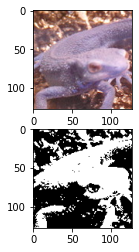

In [4]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def BGR2GRAY(img):
    _img = img.astype("float32")
    blue, green, red = _img[:,:,0],_img[:,:,1],_img[:,:,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

def otsu_binarize(gray_img, verbose=False):
    m = gray_img.mean()
    size = gray_img.shape[0] * gray_img.shape[1]
    max_sb = -1
    max_t = -1
    for t in range(0, 255):
        cond = gray_img<=t
        w0 = cond.sum() / float(size)
        w1 = 1 - w0
        
        m0 = gray_img[cond].mean() if w0>0 else 0
        m1 = gray_img[~cond].mean() if w1>0 else 0
        
        sb = w0*w1*(m0-m1)**2
        if sb > max_sb:
            max_sb, max_t = sb, t
    if verbose:
        print("best thres is %d with max_sb=%f" % (max_t, max_sb))
    return np.where(gray_img<=max_t, 0, 255)


img = cv2.imread("../Question_01_10/imori.jpg")
img2 = otsu_binarize(BGR2GRAY(img), verbose=True)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2, cmap="gray")
plt.show()


## 5. $\text{HSV}$变换
$\text{HSV}$即使用**色相（Hue）、饱和度（Saturation）、明度（Value）**来表示色彩的一种方式。

- 色相：将颜色使用$0^{\circ}$到$360^{\circ}$表示，就是平常所说的颜色名称，如红色、蓝色。色相与数值按下表对应：

  | 红          | 黄           | 绿            | 青色          | 蓝色          | 品红          | 红            |
  | ----------- | ------------ | ------------- | ------------- | ------------- | ------------- | ------------- |
  | $0^{\circ}$ | $60^{\circ}$ | $120^{\circ}$ | $180^{\circ}$ | $240^{\circ}$ | $300^{\circ}$ | $360^{\circ}$ |

- 饱和度：是指色彩的纯度，饱和度越低则颜色越黯淡（$0\leq S < 1$）；
- 明度：即颜色的明暗程度。数值越高越接近白色，数值越低越接近黑色（$0\leq V < 1$）；

从$\text{RGB}$色彩表示转换到$\text{HSV}$色彩表示通过以下方式计算：

$\text{RGB}$的取值范围为$[0, 1]$，令：
$$
\text{Max}=\max(R,G,B)\\
\text{Min}=\min(R,G,B)
$$
色相：
$$
H=\begin{cases}
0&(\text{if}\ \text{Min}=\text{Max})\\
60\  \frac{G-R}{\text{Max}-\text{Min}}+60&(\text{if}\ \text{Min}=B)\\
60\  \frac{B-G}{\text{Max}-\text{Min}}+180&(\text{if}\ \text{Min}=R)\\
60\  \frac{R-B}{\text{Max}-\text{Min}}+300&(\text{if}\ \text{Min}=G)
\end{cases}
$$
饱和度：
$$
S=\text{Max}-\text{Min}
$$
明度：
$$
V=\text{Max}
$$
从$\text{HSV}$色彩表示转换到$\text{RGB}$色彩表示通过以下方式计算：
$$
C = S\\
H' = \frac{H}{60}\\
X = C\  (1 - |H' \mod 2 - 1|)\\
(R,G,B)=(V-C)\ (1,1,1)+\begin{cases}
(0, 0, 0)&  (\text{if H is undefined})\\
(C, X, 0)&  (\text{if}\quad 0 \leq H' < 1)\\
(X, C, 0)&  (\text{if}\quad 1 \leq H' < 2)\\
(0, C, X)&  (\text{if}\quad 2 \leq H' < 3)\\
(0, X, C)&  (\text{if}\quad 3 \leq H' < 4)\\
(X, 0, C)&  (\text{if}\quad 4 \leq H' < 5)\\
(C, 0, X)&  (\text{if}\quad 5 \leq H' < 6)
\end{cases}
$$
请将色相反转（色相值加$180$），然后再用$\text{RGB}$色彩空间表示图片。

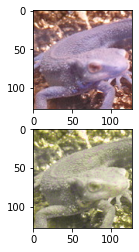

In [11]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb


def BGR2HSV(img):
    out = np.zeros_like(img, dtype='float32')
    _img = img.astype("float32") / 255.0    

    MAX = np.max(_img, axis=2).copy()
    MIN = np.min(_img, axis=2).copy()
    MIN_idx = _img.argmin(axis=2).copy()

    ind = np.where(MIN == MAX)
    out[..., 0][ind] = 0
    ind = np.where(MIN_idx==0)
    out[..., 0][ind] = 60 * (_img[..., 1][ind]-_img[..., 2][ind])/(MAX[ind]-MIN[ind]) + 60
    ind = np.where(MIN_idx==2)
    out[..., 0][ind] = 60 * (_img[..., 0][ind]-_img[..., 1][ind])/(MAX[ind]-MIN[ind]) + 180
    ind = np.where(MIN_idx==1)
    out[..., 0][ind] = 60 * (_img[..., 2][ind]-_img[..., 0][ind])/(MAX[ind]-MIN[ind]) + 300
    
    out[..., 1] = MAX.copy() - MIN.copy()
    out[..., 2] = MAX.copy()
    return out


img = cv2.imread("../Question_01_10/imori.jpg")
img2 = BGR2HSV(img)
plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(hsv_to_rgb(img2))
plt.show()

## 6. 减色处理
我们将图像的值由$256^3$压缩至$4^3$，即将$\text{RGB}$的值只取${32, 96, 160, 224}$。这被称作色彩量化。色彩的值按照下面的方式定义： $$ \text{val}= \begin{cases} 32& (0 \leq \text{var} < 64)\\ 96& (64\leq \text{var}<128)\\ 160&(128\leq \text{var}<192)\\ 224&(192\leq \text{var}<256) \end{cases} $$

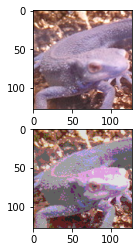

In [6]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt


def decrease_color(bgr_img):
    out = bgr_img.copy()
    out = out // 64 * 64 + 32
    return out

img = cv2.imread("../Question_01_10/imori.jpg")
img2 = decrease_color(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2)
plt.show()

## 7. 平均池化（Average Pooling）
将图片按照固定大小网格分割，网格内的像素值取网格内所有像素的平均值。

我们将这种把图片使用均等大小网格分割，并求网格内代表值的操作称为池化（Pooling）。

池化操作是**卷积神经网络（Convolutional Neural Network）**中重要的图像处理方式。平均池化按照下式定义： $$ v=\frac{1}{|R|}\ \sum\limits_{i=1}^R\ v_i $$ 请把大小为$128\times128$的imori.jpg使用$8\times8$的网格做平均池化。

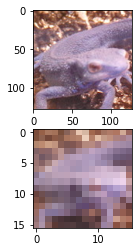

In [7]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt


def average_pooling(bgr_img, kernal_shape=8):
    H, W, C = bgr_img.shape
    if H % kernal_shape != 0:
        raise Exception("H % kernal_shape != 0")
    if W % kernal_shape != 0:
        raise Exception("W % kernal_shape != 0")
    
    H_steps = H // kernal_shape
    W_steps = W // kernal_shape
    out = np.zeros([H_steps, W_steps, 3], dtype='uint8')
    K = kernal_shape
    for i in range(H_steps):
        for j in range(W_steps):
            out[i, j] = bgr_img[i*K:(i+1)*K, j*K:(j+1)*K].mean(axis=(0,1)).astype('uint8')
    return out

img = cv2.imread("../Question_01_10/imori.jpg")
img2 = average_pooling(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2)
plt.show()

## 8. 最大池化（Max Pooling）
网格内的值不取平均值，而是取网格内的最大值进行池化操作。

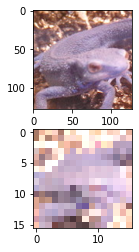

In [8]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt


def max_pooling(bgr_img, kernal_shape=8):
    H, W, C = bgr_img.shape
    if H % kernal_shape != 0:
        raise Exception("H % kernal_shape != 0")
    if W % kernal_shape != 0:
        raise Exception("W % kernal_shape != 0")
    
    H_steps = H // kernal_shape
    W_steps = W // kernal_shape
    out = np.zeros([H_steps, W_steps, 3], dtype='uint8')
    K = kernal_shape
    for i in range(H_steps):
        for j in range(W_steps):
            out[i, j] = bgr_img[i*K:(i+1)*K, j*K:(j+1)*K].max(axis=(0,1)).astype('uint8')
    return out

img = cv2.imread("../Question_01_10/imori.jpg")
img2 = max_pooling(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2)
plt.show()

## 9. 高斯滤波（Gaussian Filter）
使用高斯滤波器（$3\times3$大小，标准差$\sigma=1.3$）来对imori_noise.jpg进行降噪处理吧！

高斯滤波器是一种可以使图像平滑的滤波器，用于去除噪声。可用于去除噪声的滤波器还有中值滤波器（参见问题十），平滑滤波器（参见问题十一）、LoG滤波器（参见问题十九）。

高斯滤波器将中心像素周围的像素按照高斯分布加权平均进行平滑化。这样的（二维）权值通常被称为卷积核（kernel）或者滤波器（filter）。

但是，由于图像的长宽可能不是滤波器大小的整数倍，因此我们需要在图像的边缘补$0$。这种方法称作Zero Padding。并且权值$g$（卷积核）要进行归一化操作（$\sum\ g = 1$）。

按下面的高斯分布公式计算权值： $$ g(x,y,\sigma)=\frac{1}{2\ \pi\ \sigma^2}\ e^{-\frac{x^2+y^2}{2\ \sigma^2}} $$

标准差$\sigma=1.3$的$8-$近邻高斯滤波器如下： $$ K=\frac{1}{16}\ \left[ \begin{matrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{matrix} \right] $$

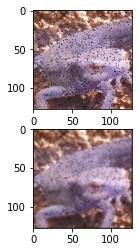

In [9]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def guassian_filter(bgr_img, K_size=3, sigma=1.3):
    # prepare kernel (以中心为坐标(0,0))
    n_pad = K_size // 2
    K = np.zeros((K_size, K_size), dtype="float32")
    for x in range(-n_pad, -n_pad + K_size):
        for y in range(-n_pad, -n_pad + K_size):
            K[y + n_pad, x + n_pad] = np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * sigma * sigma)
    K /= K.sum()

    # zero padding
    KH, KW = K_size, K_size
    H, W, C = bgr_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2, C], dtype="float32")
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = bgr_img.copy().astype('float32')

    # gussian filter
    out = np.zeros_like(bgr_img)
    K3 = np.tile(np.expand_dims(K, axis=2), [1,1,C])
    for i in range(H):
        for j in range(W):
            out[i, j] = (pad[i:i+KH, j:j+KW] * K3).sum(axis=(0,1)).astype(bgr_img.dtype)
    out = np.clip(out, 0, 255)
    return out


img = cv2.imread("../Question_01_10/imori_noise.jpg")
img2 = guassian_filter(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2)
plt.show()

## 10. 中值滤波（Median Filter）
使用中值滤波器（$3\times3$大小）来对imori_noise.jpg进行降噪处理吧！

中值滤波器是一种可以使图像平滑的滤波器。这种滤波器用滤波器范围内（在这里是$3\times3$）像素点的中值进行滤波，请在这里也采用Zero Padding。

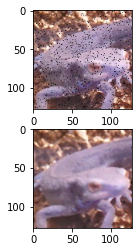

In [10]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def median_filter(bgr_img, K_size=3):
    # zero padding
    KH, KW = K_size, K_size
    H, W, C = bgr_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2, C], dtype=bgr_img.dtype)
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = bgr_img.copy()

    # median filter
    out = np.zeros_like(bgr_img)
    for i in range(H):
        for j in range(W):
            out[i, j] = np.median(pad[i:i+KH, j:j+KW], axis=(0,1))
    return out


img = cv2.imread("../Question_01_10/imori_noise.jpg")
img2 = median_filter(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2)
plt.show()